This is another example.

## This is an example to show how changes on git work.

In [146]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats


In [147]:
df = pd.read_csv("American_Housing_Data_20231209.csv")
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [149]:
df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39979.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47309.055715,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [150]:
df.shape
#rows, columns

(39981, 14)

# Question: What variables are correlated with price?

**Answer: The vartiables that influence price the most are 'Median Household Income', 'Living Space', and 'Baths'**


In [151]:
# Creating correlation heatmap
correlations = df.select_dtypes('number').corr() # Filtering df for numeric data types
correlations

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
Zip Code,1.000000,0.110929,0.014740,0.004543,0.032537,-0.024488,-0.105494,0.148406,-0.050228,-0.940078
Price,0.110929,1.000000,0.277072,0.462072,0.520565,-0.042924,0.152544,0.416785,-0.058837,-0.168266
Beds,0.014740,0.277072,1.000000,0.703425,0.655098,0.069366,-0.131888,0.014459,-0.051626,0.006812
Baths,0.004543,0.462072,0.703425,1.000000,0.769079,0.001957,-0.068164,0.226429,-0.101349,0.000718
Living Space,0.032537,0.520565,0.655098,0.769079,1.000000,-0.042956,-0.103706,0.222995,-0.062532,-0.011148
Zip Code Population,-0.024488,-0.042924,0.069366,0.001957,-0.042956,1.000000,0.112308,-0.125361,-0.083752,-0.019359
Zip Code Density,-0.105494,0.152544,-0.131888,-0.068164,-0.103706,0.112308,1.000000,0.175198,0.184290,0.021751
Median Household Income,0.148406,0.416785,0.014459,0.226429,0.222995,-0.125361,0.175198,1.000000,0.047571,-0.220311
Latitude,-0.050228,-0.058837,-0.051626,-0.101349,-0.062532,-0.083752,0.184290,0.047571,1.000000,-0.046189
Longitude,-0.940078,-0.168266,0.006812,0.000718,-0.011148,-0.019359,0.021751,-0.220311,-0.046189,1.000000


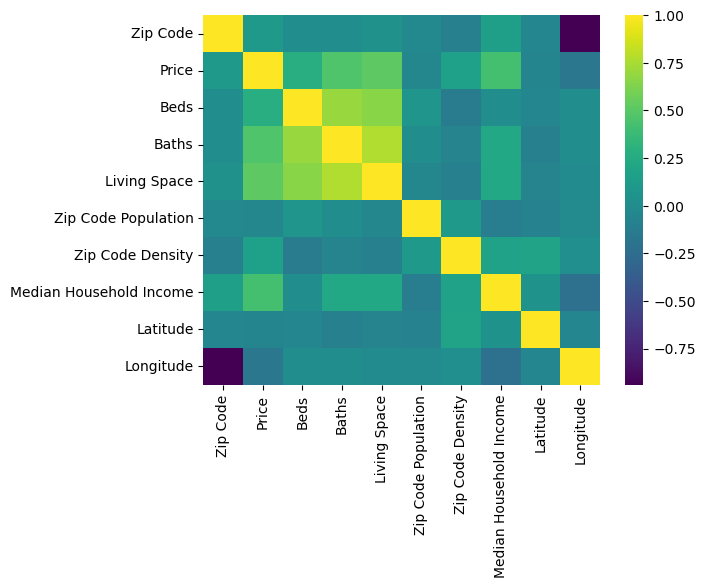

In [152]:
#Heatmap showing Pearson Correlation Coefficient for each category
sns.heatmap(correlations, cmap='viridis'); # Creating plot

Insights: Highly Coorelated Aspects

* Price & Beds
* Price & Living Space
* Price & Median Household Income
* Beds & Baths
* Baths & Living Space


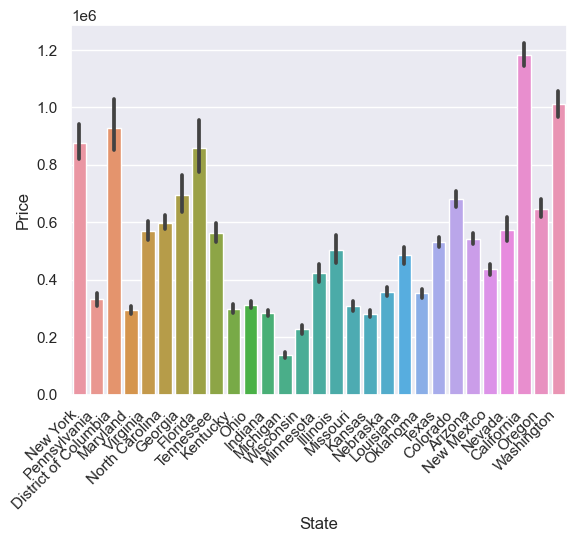

In [194]:
#Barplot representing sate and price 
sns.barplot(data=df, x = 'State', y = 'Price');plt.xticks(rotation=45, ha='right');


In [154]:
# Curious about WA prices
# Subsetting df for WA and price
wa_price = df.loc[df['State'] == 'Washington'][['Price', 'State']]
wa_price

,Price,State
39121,1039000.0,Washington
39122,475000.0,Washington
39123,474500.0,Washington
39124,1595000.0,Washington
39125,919000.0,Washington
...,...,...
39976,2495000.0,Washington
39977,2295000.0,Washington
39978,950000.0,Washington
39979,425000.0,Washington


In [159]:
import json

geo_url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
geojson_data = json.load(open(geo_url))

# Create choropleth map
fig = px.choropleth_mapbox(
    df,
    geojson=geojson_data,  
    locations='Zip Code',
    featureidkey="properties.ZIPCODE",
    color='Price',
    color_continuous_scale='OrRd',
    mapbox_style="carto-positron",
    center={"lat": df['Latitude'].mean(), "lon": df['Longitude'].mean()},
    zoom=10,
    opacity=0.5,
    labels={'Price': 'Housing Price'},
)

# Show the interactive map
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'

In [ ]:
#Filtering the numerical values in the cloums 'Zip Code Ppoulation' into values <1500 and >1500
equal_below_fifteen = df.loc[(df['Zip Code Population'] <= 1500)]
above_fifteen = df.loc[(df['Zip Code Population'] > 1500)]

equal_below_fifteen, above_fifteen


(       Zip Code      Price  Beds  Baths  Living Space  \
 7231      33109  5600000.0     3      4          3550   
 7965      37201   439000.0     1      1           630   
 7966      37201   499500.0     1      1           720   
 7967      37201   357500.0     1      1           475   
 7968      37201   995000.0     2      2          1187   
 ...         ...        ...   ...    ...           ...   
 37418     95140  2688000.0     3      4          3768   
 39907     98164   599000.0     1      1           808   
 39908     98164   599000.0     1      1           808   
 39909     98164   664950.0     1      2           979   
 39910     98164   579000.0     1      1           808   
 
                             Address            City       State  \
 7231   4822 FISHER ISLAND DR # 4822     Miami Beach     Florida   
 7965                 1068 1ST AVE N       Nashville   Tennessee   
 7966    301 DEMONBREUN ST UNIT 1207       Nashville   Tennessee   
 7967          309 CHURCH ST A

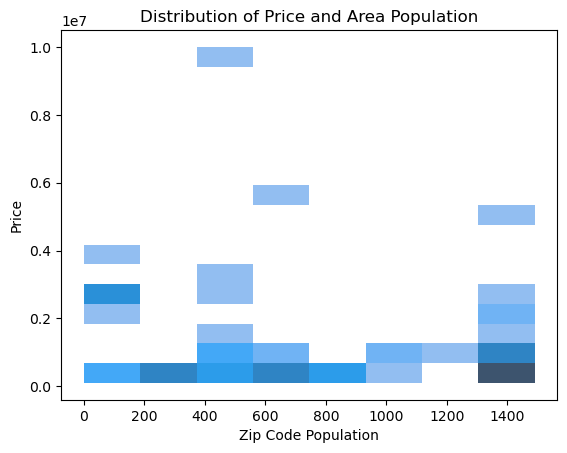

In [ ]:
#Boxplot between price and populations <= 1500
sns.histplot(data = equal_below_fifteen, x = 'Zip Code Population', y ='Price').set(title = 'Distribution of Price and Area Population');

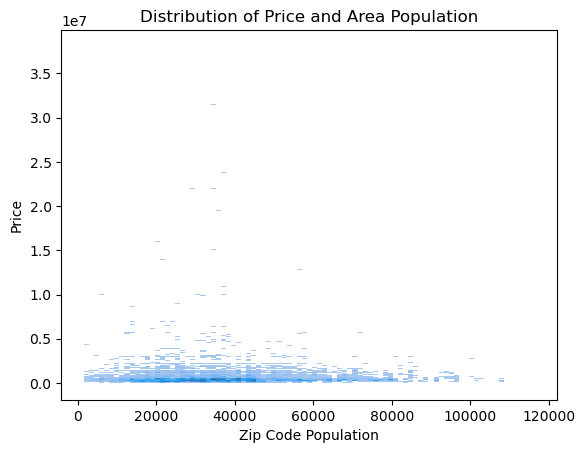

In [ ]:
sns.histplot(data = above_fifteen, x = 'Zip Code Population', y ='Price').set(title = 'Distribution of Price and Area Population');

# Question : What state has the biggest houses in square footage?

In [ ]:
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude,State Abbreviation
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472,US-NY
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472,US-NY
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,US-NY
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,US-NY
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,US-NY


In [ ]:
#Attempt to convert all US states into their abreviated version
import pycountry
#df['State Abbreviation'] = df['State'].apply(lambda x: pycountry.subdivisions.get(name=x, country_code='US').code if pycountry.subdivisions.get(name=x, country_code='US') else None)


In [ ]:
#Creating a new column 'state_abbreviations' to abriviate each US state
import pycountry
import seaborn as sns
#state_abbreviations = {}
#for state in pycountry.subdivisions.get(country_code='US'):
 #   state_abbreviations[state.name] = state.code

#print(state_abbreviations)
#df['State Abbreviation'] = df['State'].map(state_abbreviations)


In [ ]:

#half_df = len(df) / 2
#df1 = df.head(half_len)
#df2 = df.tail(half_len)

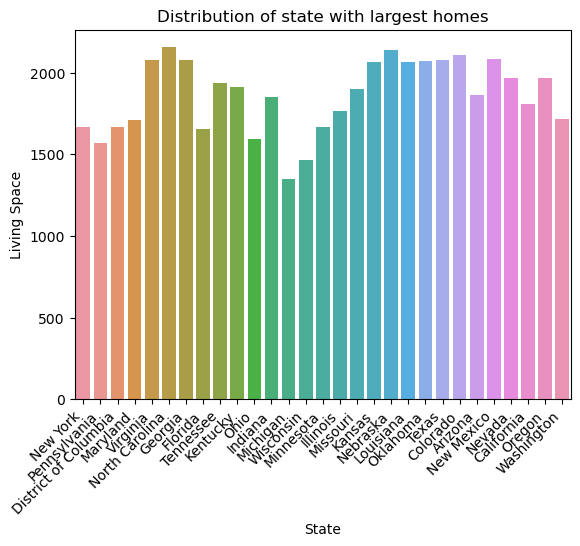

In [157]:
#Distribution of States and Living Space
sns.barplot(x='State', y='Living Space', data=df, errorbar=None).set(title='Distribution of state with largest homes')
plt.xticks(rotation=45, ha='right');


Insights: States with largest homes            
* North Carolina
* Virginia
* Georgia
* New Mexico
* Colorado
* Nebraska

Insights : States with smallest homes
* Michigan
* Wisconsin

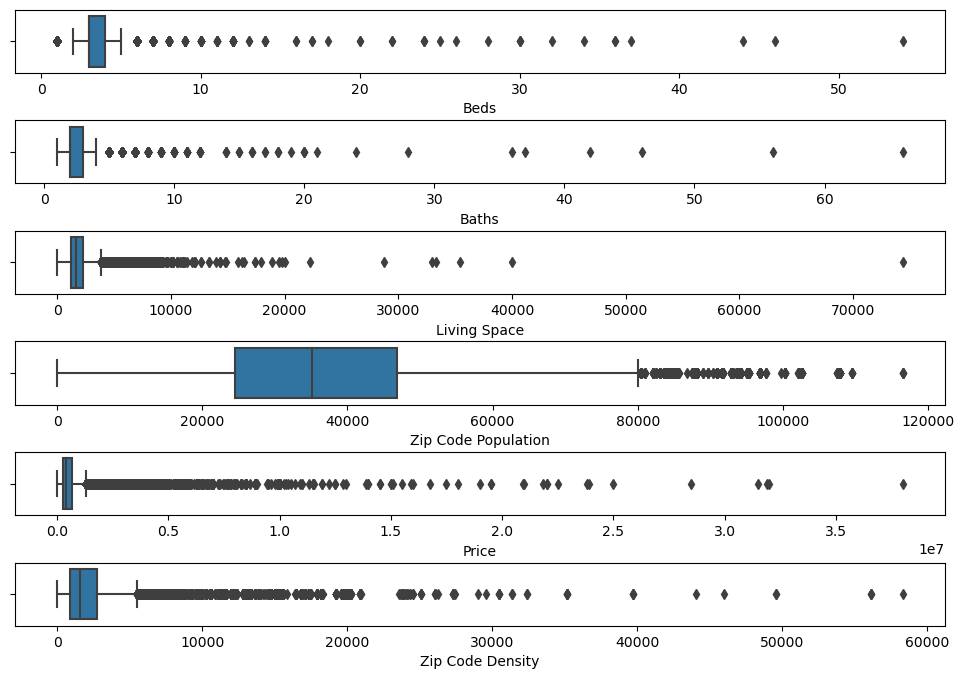

In [158]:
#Boxplot visualizaitons
columns_names = ['Beds', 'Baths','Living Space','Zip Code Population','Price', 'Zip Code Density']

fig, ax = plt.subplots(len(columns_names), 1, figsize=(12, 8))
fig.subplots_adjust(hspace=0.75)

for i in range(len(columns_names)):
    sns.boxplot(x=columns_names[i], data=df, ax=ax[i]);

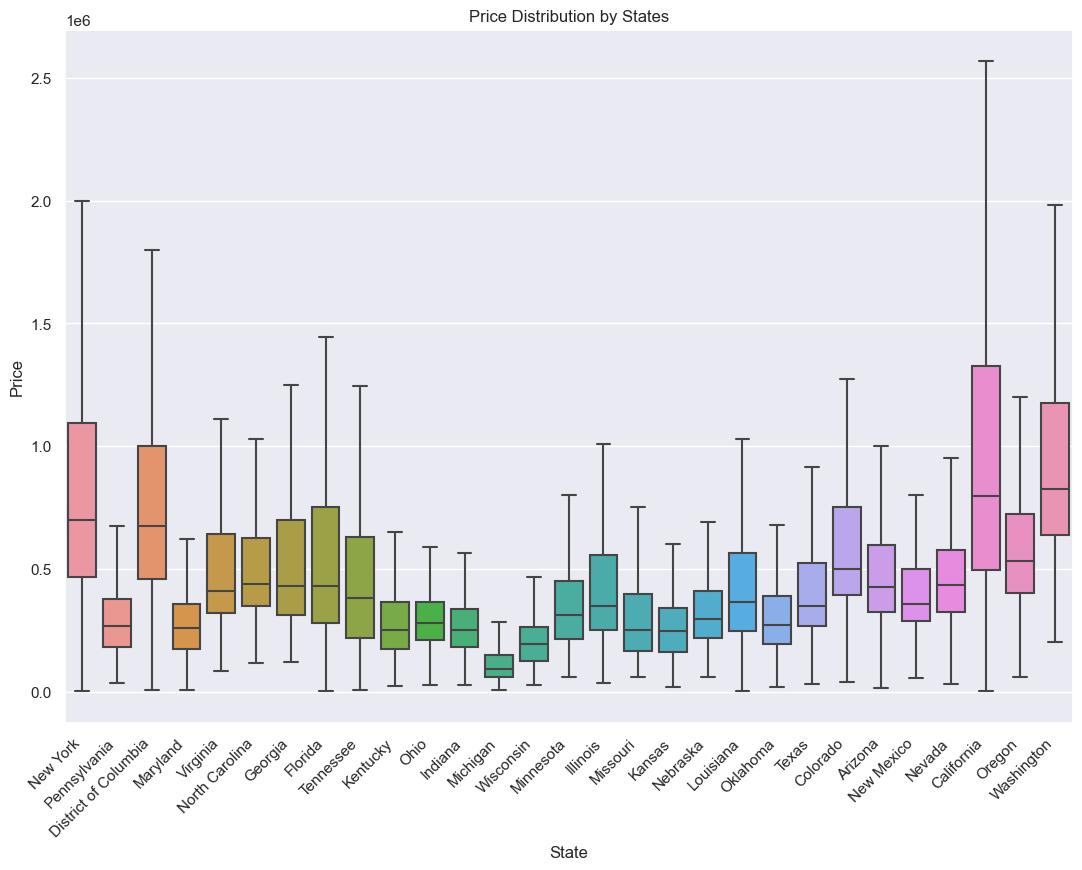

In [198]:
plt.figure(figsize=(13,9))
plt.title('Price Distribution by States')
sns.boxplot(x='State', y='Price', data=df, showfliers=False)
plt.xticks(rotation=45, ha='right');



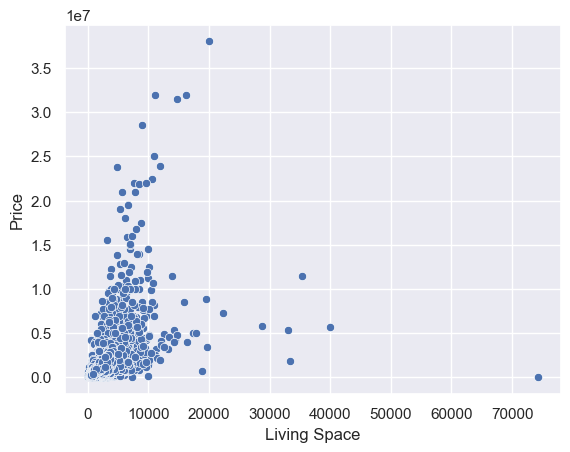

In [178]:
sns.scatterplot(data=df, x='Living Space',y='Price');

The median house price is: $399900.0


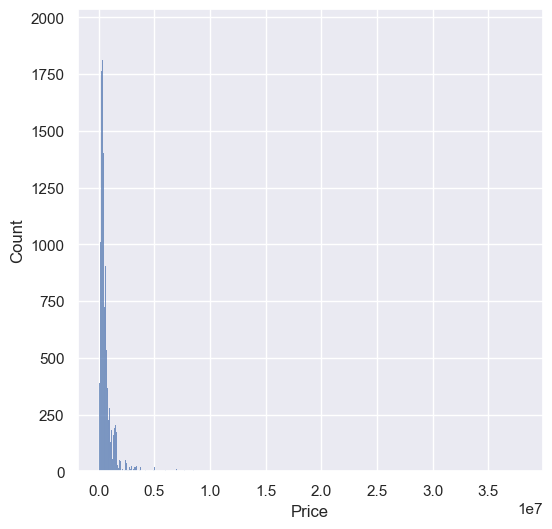

In [193]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x='Price');

median = np.median(df['Price'])
print(f'The median house price is: ${round(median,2)}')